<a href="https://colab.research.google.com/github/tiasnyder/PHYS250/blob/main/SNYDER_3_Body_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling Planetary Motion

*written by Rose Finn*

*adapted from Giordano and Nakanishi, Chapter 4*


The goal of this lab is to model the motion of a planet orbiting a star.  We will start by modeling the Earth's motion around the Sun, but we write the code in such a way that it can be easily adapted to model other 2-body systems.

* In class, we reviewed the units that we will use in the lab, namely our distances will be in Astronomical Units (AU, where 1 AU is the mean distance between the Earth and Sun), and our time will be measured in years.

* We will assume that the Sun is fixed at a central position, and the Earth revolves around it.

In [148]:
# import numpy and pyplot
import numpy as np
from matplotlib import pyplot as plt

# Write the initialize function

Write a function called **initialize** that does the following.
* Input
  * initial x position, $x_0$
  * initial y position, $y_0$
  * initial x velocity, $v_{0x}$
  * initial y velocity, $v_{0y}$
  * total time, $tmax$
  * time step, $dt$

* The function should:
  *  calculate the number of time steps
  ```
  nsteps = int(tmax/dt)
  ```
  * create the time, x, y, vx, vy arrays using `np.zeros`
  * set the first value of the x array to $x_0$
  * set the first value of the y array to $y_0$
  * set the first value of the vx array to $v_{0x}$
  * set the first value of the vy array to $v_{0y}$

* The function should return the following arrays *in this order*:
  * time array
  * x position array
  * y position array
  * x velocity array
  * y velocity array

In [149]:
# write your initialize function here


def initialize(x0e,y0e,x0j,y0j,v0xe,v0ye,v0xj,y0yj,tmax,dt):
  nsteps = int(tmax/dt)

  t = np.zeros(nsteps)

  xe = np.zeros(nsteps)
  ye = np.zeros(nsteps)

  xj = np.zeros(nsteps)
  yj = np.zeros(nsteps)

  vxe = np.zeros(nsteps)
  vye = np.zeros(nsteps)

  vxj = np.zeros(nsteps)
  vyj = np.zeros(nsteps)

  xe[0] = x0e
  ye[0] = y0e

  xj[0] = x0j
  yj[0] = y0j

  vxe[0] = v0xe
  vye[0] = v0ye

  vxj[0] = v0xj
  vyj[0] = v0yj

  return t,xe,ye,xj,yj,vxe,vye,vxj,vyj

# Distance Function

Write a function called **distance** to calculate the distance between the Earth and Sun given the Earth's x and y positions.  We assume throughout that the Sun is located at $x=0, y=0$, and that the Sun does not move.

Write a function called **distance** that does the following.
* Input
  * x position, $x$
  * y position, $y$

* The function should:
  *  calculate the distance between the Earth and Sun
  ```
  r = np.sqrt(x**2 + y**2)
  ```


* The function should return :
  * the distance $r$

In [150]:
# write your distance function here
def distance(x,y):
  r = np.sqrt(x**2 +y**2)

  return r

# Calculate function

Write a function called **calculate** that does the following.
* Input
  * time array, $time$
  * x position, $x$
  * y position, $y$
  * x velocity, $v_{x}$
  * y velocity, $v_{y}$
  * time step, $dt$
  * optional argument **cromer** that has a default value of ```True```

* The function should:
  * calculate vx, vy, and time
  * if ```cromer=True```, use the Euler-Cromer method to calculate x and y
  * if ```cromer=False```, use the Euler method to calculate x and y

* The function should return the following arrays *in this order*:
  * time array
  * $x$ position array
  * $y$ position array
  * $v_{x}$ velocity array
  * $v_{y}$ velocity array

In [151]:
# write your calculate function
def calculate(t,xe,ye,xj,yj,vxe,vye,vxj,vyj,Mj,Ms,Me,dt,cromer=True):

  for i in range(1,len(t)):
    rSE = distance(xe[i-1],ye[i-1])
    rSJ = distance(xj[i-1],yj[i-1])
    rEJ = distance(xj[i-1]-xe[i-1],yj[i-1]-ye[i-1])

    vxe[i] = vxe[i-1] - (((4*np.pi**2)*xe[i-1])/rSE**3)*dt - (4*np.pi**2*(Mj/Ms)*(xe[i-1]-xj[i-1])/rEJ**3)*dt
    vye[i] = vye[i-1] - (((4*np.pi**2)*ye[i-1])/rSE**3)*dt - (4*np.pi**2*(Mj/Ms)*(ye[i-1]-yj[i-1])/rEJ**3)*dt

    vxj[i] = vxj[i-1] - (((4*np.pi**2)*xj[i-1])/rSJ**3)*dt - (4*np.pi**2*(Me/Ms)*(xj[i-1]-xe[i-1])/rEJ**3)*dt
    vyj[i] = vyj[i-1] - (((4*np.pi**2)*yj[i-1])/rSJ**3)*dt - (4*np.pi**2*(Me/Ms)*(yj[i-1]-ye[i-1])/rEJ**3)*dt

    if cromer == True:
      xe[i] = xe[i-1] + vxe[i]*dt
      ye[i] = ye[i-1] + vye[i]*dt

      xj[i] = xj[i-1] + vxj[i]*dt
      yj[i] = yj[i-1] + vyj[i]*dt

#    else:
#      x[i] = x[i-1] + vx[i-1]*dt
#      y[i] = y[i-1] + vy[i-1]*dt

    t[i] = t[i-1] + dt

  return t,xe,ye,xj,yj,vxe,vye,vxj,vyj

# Function to make plots

Write a function called **make_plots** that does the following.
* Input
  * time array, $time$
  * x position, $x$
  * y position, $y$
  * x velocity, $v_{x}$
  * y velocity, $v_{y}$


* The function should:
  * set the figure size to (15,4)
  ```python
  plt.figure(figsize=(15,4))
  plt.subplots_adjust(wspace=.35)
  ```
  * use the ```plt.subplot``` command to make a plot with one row and three columns.
  * plot y vs x in the first panel using scatter, and color the points using the time array.  The following code snippet should help.  Note: we are using ```plt.axis('equal')``` so that the x and y axes are on the same scale.  This will make a circle look like a circle.
  ```
  plt.scatter(x,y,c=time,s=10)
  plt.colorbar(label="Time (yr)")
  plt.axis('equal')
  ```
  * plot x, y, and the radius (```r = np.sqrt(x**2+y**2) ```) vs time in the second plot.
  * plot vx, vy, and the magnitude of the total velocity  (```v = np.sqrt(vx**2+vy**2) ```) vs time in the third plot.
  * be sure to label the axes in each plot, and use the correct units.
  * add a legend to the second and third panels.

* The function does not return anything.

In [152]:
# write your make_plots function here
def make_plots(t,xe,ye,xj,yj,vxe,vye,vxj,vyj):
  re = distance(xe,ye)
  ve = np.sqrt(vxe**2 + vye**2)

  rj = distance(xj,yj)
  vj = np.sqrt(vxj**2 + vyj**2)

  plt.figure(figsize=(25,10))
  plt.subplots_adjust(wspace=.35)

  plt.subplot(1,2,1)
  plt.scatter(xe,ye,c=t,s=10,label='X Position vx Y Position (Earth)')
  plt.scatter(xj,yj,c=t,s=10,label='X Position vx Y Position (Jupiter)')
  plt.xlabel('X Position (AU)')
  plt.ylabel('Y Position (AU)')
  plt.colorbar(label="Time (yr)")
  plt.axis('equal')

  plt.subplot(2,4,3)
  plt.plot(t,xe,label='X Position vs Time (Earth)')

  plt.plot(t,ye,label='Y Position vs Time (Earth)')
  plt.xlabel('Time (yr)')
  plt.ylabel('Distance (AU)')

  plt.subplot(2,4,4)
  plt.plot(t,vxe,label='X Velocity vs Time (Earth)')

  plt.plot(t,vye,label='Y Velocity vs Time (Earth)')
  plt.xlabel('Time (yr)')
  plt.ylabel('Velocity (AU/yr)')

  plt.subplot(2,4,7)
  plt.plot(t,xj,label='X Position vs Time (Jupiter)')

  plt.plot(t,yj,label='Y Position vs Time (Jupiter)')
  plt.xlabel('Time (yr)')
  plt.ylabel('Distance (AU)')

  plt.subplot(2,4,8)
  plt.plot(t,vxj,label='X Velocity vs Time (Jupiter)')

  plt.plot(t,vyj,label='Y Velocity vs Time (Jupiter)')
  plt.xlabel('Time (yr)')
  plt.ylabel('Velocity (AU/yr)')

  return

# main function

Write a function called **main** that does the following.  Note, this is different from how we have structured the main program in the past, but it will allow us to modify the parameters of the model easily.

* Input
  * initial x position, $x_0$
  * initial y position, $y_0$
  * initial x velocity, $v_{0x}$
  * initial y velocity, $v_{0y}$
  * total time, $tmax$
  * time step, $dt$
  * optional argument **cromer** that has a default value of ```True```

* The function should:
  * call **initialize**
  * call **calculate**
  * call **make_plots**


* The function should return the following arrays *in this order*:
  * time array
  * $x$ position array
  * $y$ position array
  * $v_{x}$ velocity array
  * $v_{y}$ velocity array

In [153]:
# write your main function here
def main(x0e,y0e,x0j,y0j,v0xe,v0ye,v0xj,v0yj,Mj,Ms,Me,tmax,dt,cromer=True):
  t,xe,ye,xj,yj,vxe,vye,vxj,vyj = initialize(x0e,y0e,x0j,y0j,v0xe,v0ye,v0xj,v0yj,tmax,dt)

  t,xe,ye,xj,yj,vxe,vye,vxj,vyj = calculate(t,xe,ye,xj,yj,vxe,vye,vxj,vyj,Mj,Ms,Me,dt,cromer=cromer)

  make_plots(t,xe,ye,xj,yj,vxe,vye,vxj,vyj)

  return t,xe,ye,xj,yj,vxe,vye,vxj,vyj

# Run the program

(10 points)

In the cell below:

* define the initial values of x0, y0, v0x, and v0y
* define the value of tmax and dt
* then call main


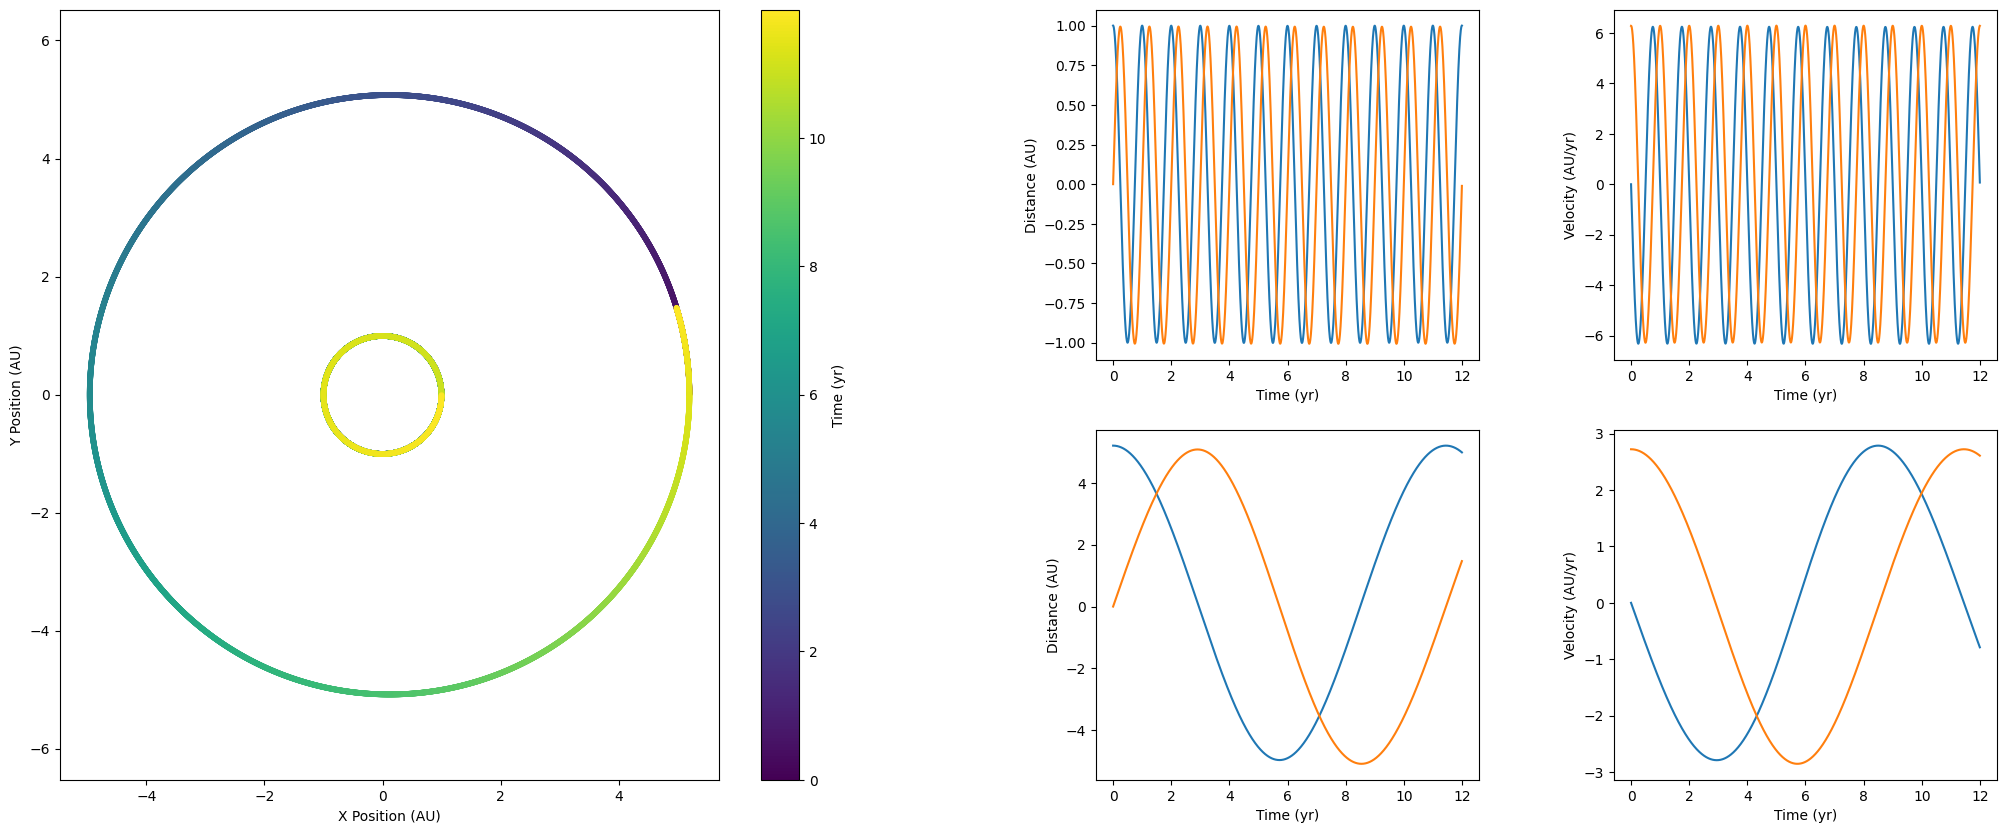

In [154]:
x0e = 1 # initial x position in AU
y0e = 0 # initial y position in AU

x0j = 5.2
y0j = 0

v0xe = 0 # initial x velocity in AU/yr
v0ye = 2*np.pi # initial y velocity in AU/yr

Tj = 12 # period of Jupiter

v0xj = 0
v0yj = (2*np.pi*5.2)/Tj

tmax = 12 # time in years
dt = .002 # time step in years
cromer = True

Ms = 2*10**30   # kg
Me = 6*10**24   # kg
Mj = 1.9*10**27 # kg

# call main
t,xe,ye,xj,yj,vxe,vye,vxj,vyj = main(x0e,y0e,x0j,y0j,v0xe,v0ye,v0xj,v0yj,Mj,Ms,Me,tmax,dt,cromer=cromer)

0.0 2.722713633111154
5.2 0.0
2.722713633111154


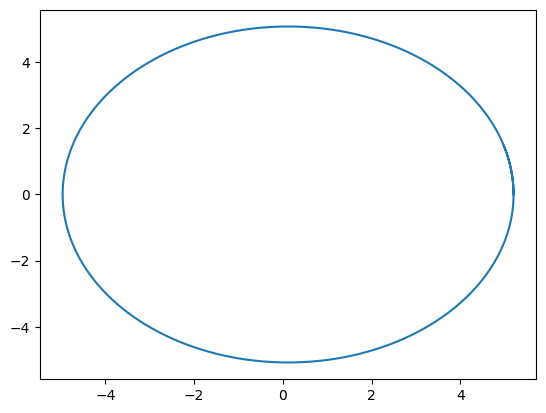

In [155]:
# debugging
plt.figure()
plt.plot(xj,yj)
print(vxj[0],vyj[0])
print(xj[0],yj[0])
print(2*np.pi*5.2/12)

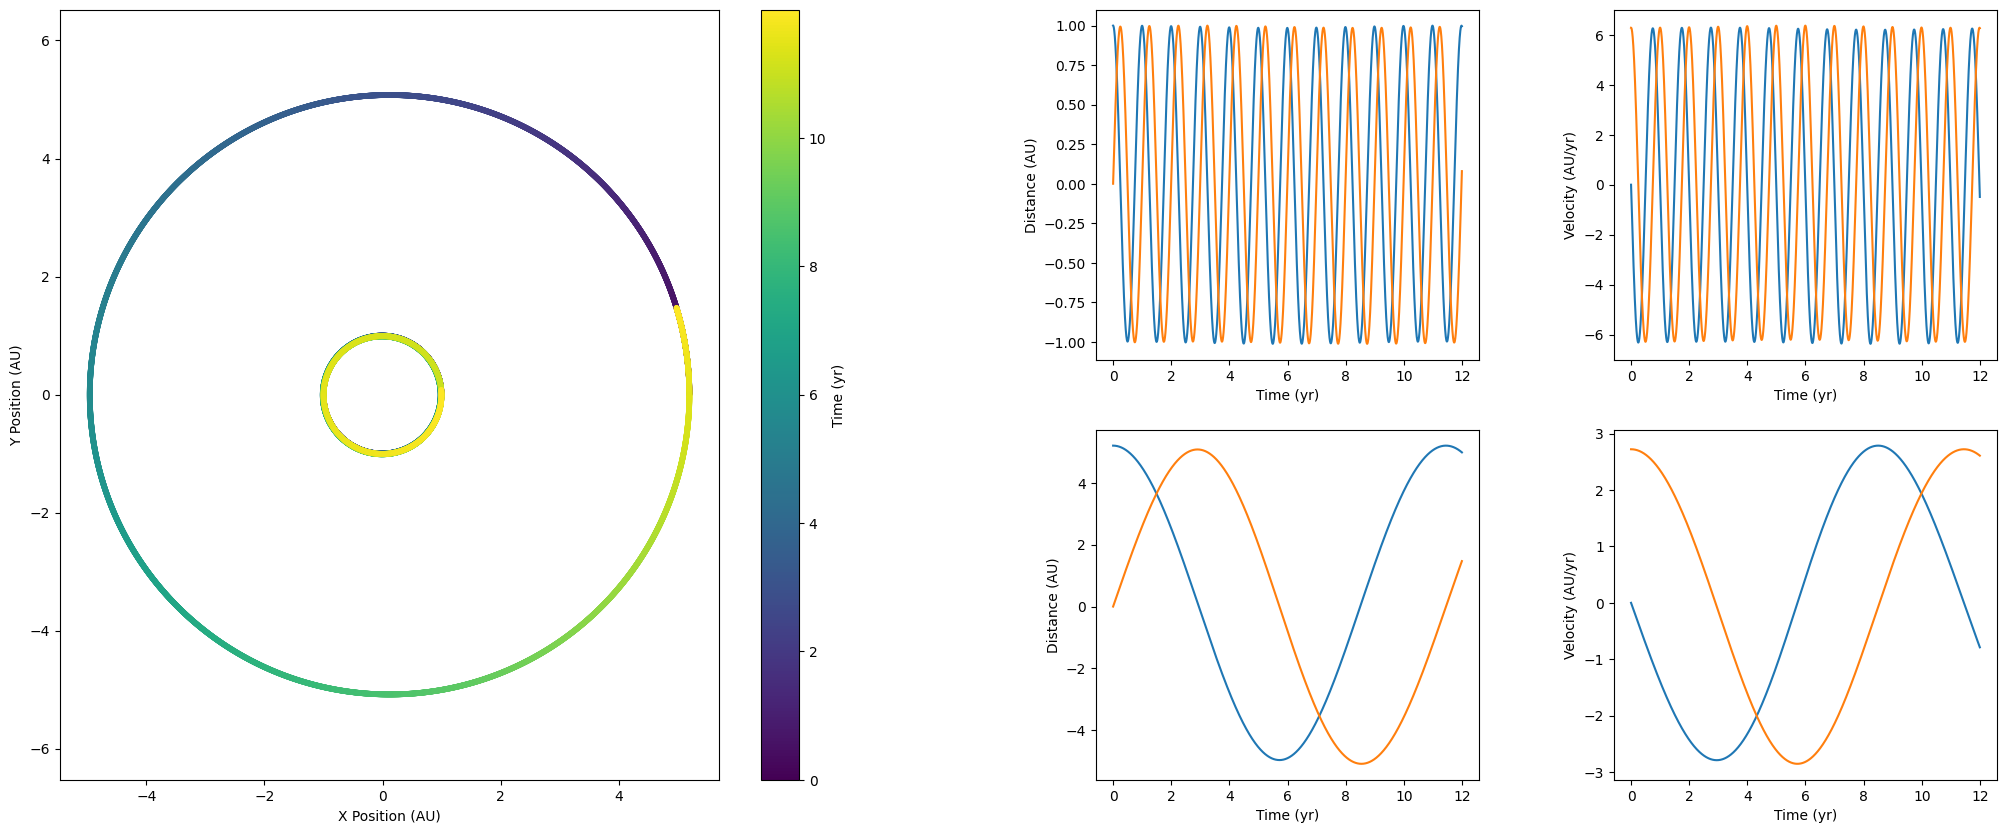

In [156]:
# Jupiter x10

x0e = 1 # initial x position in AU
y0e = 0 # initial y position in AU

x0j = 5.2
y0j = 0

v0xe = 0 # initial x velocity in AU/yr
v0ye = 2*np.pi # initial y velocity in AU/yr

Tj = 12 # period of Jupiter

v0xj = 0
v0yj = (2*np.pi*5.2)/Tj

tmax = 12 # time in years
dt = .002 # time step in years
cromer = True

Ms = 2*10**30   # kg
Me = 6*10**24   # kg
Mj = 1.9*10**28 # kg

# call main
t,xe,ye,xj,yj,vxe,vye,vxj,vyj = main(x0e,y0e,x0j,y0j,v0xe,v0ye,v0xj,v0yj,Mj,Ms,Me,tmax,dt,cromer=cromer)

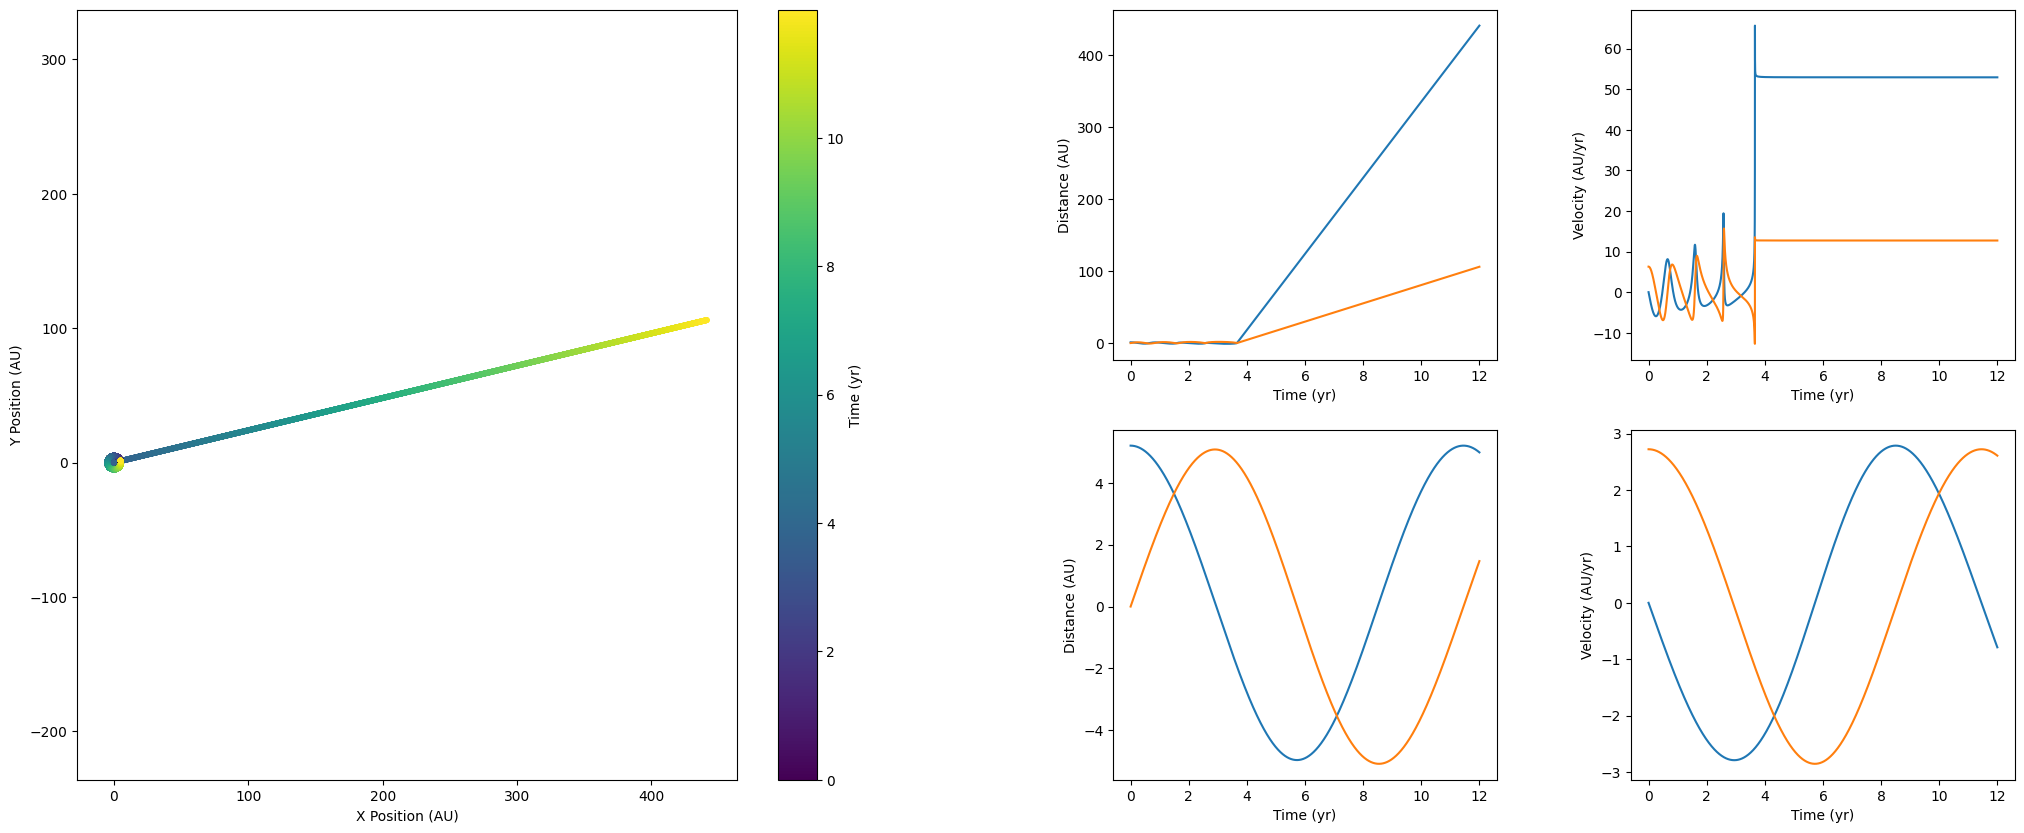

In [157]:
# Jupiter x1000

x0e = 1 # initial x position in AU
y0e = 0 # initial y position in AU

x0j = 5.2
y0j = 0

v0xe = 0 # initial x velocity in AU/yr
v0ye = 2*np.pi # initial y velocity in AU/yr

Tj = 12 # period of Jupiter

v0xj = 0
v0yj = (2*np.pi*5.2)/Tj

tmax = 12 # time in years
dt = .002 # time step in years
cromer = True

Ms = 2*10**30   # kg
Me = 6*10**24   # kg
Mj = 1.9*10**30 # kg

# call main
t,xe,ye,xj,yj,vxe,vye,vxj,vyj = main(x0e,y0e,x0j,y0j,v0xe,v0ye,v0xj,v0yj,Mj,Ms,Me,tmax,dt,cromer=cromer)